## Import Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf
from tensorflow.keras import Sequential
from keras.layers import Dense


import warnings
warnings.filterwarnings("ignore")

## Reading Data

In [2]:
df = pd.read_csv("churn.csv")

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.drop('customerID',axis = 1,inplace = True)

df.head(2)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


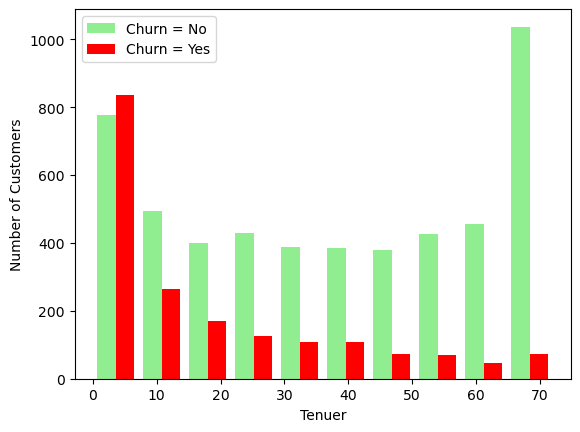

In [5]:
# lets see the visualization for "tenure"[it means how loyal customer is, if their is any problem with network or other issues]
# Lets check how many of the Loyal customer are leaving and not leaving


churn_no = df[df['Churn']=='No']['tenure']        #customer not leaving
churn_yes = df[df['Churn']=='Yes']['tenure']      #customer leaving


# Plot
plt.hist([churn_no, churn_yes], color = ['lightgreen','red'], label=['Churn = No','Churn = Yes'])
plt.xlabel('Tenuer')
plt.ylabel('Number of Customers')
plt.legend()

- Customers with a tenure of 70 months or more exhibit a high retention rate.
- The majority of customers, numbering over 1000, with a tenure of 70 months or more are not leaving the company.
- Conversely, the number of customers leaving the company with a tenure of 70 months or more is less than 100.

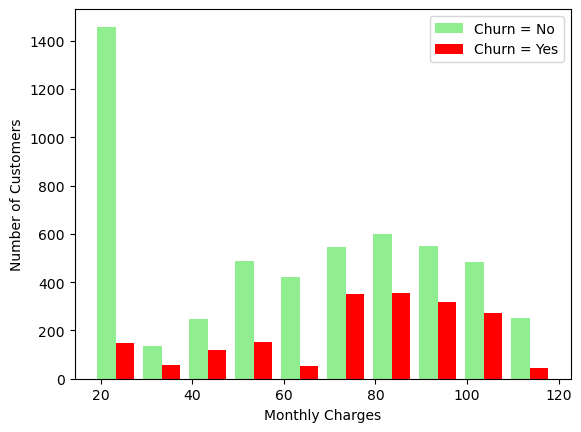

In [6]:
# Lets see it with "Monthly Charges"

mc_churn_no = df[df['Churn']=='No']['MonthlyCharges']
mc_churn_yes = df[df['Churn']=='Yes']['MonthlyCharges']


plt.hist([mc_churn_no, mc_churn_yes], color = ['lightgreen','red'],label = ['Churn = No','Churn = Yes'])
plt.xlabel('Monthly Charges')
plt.ylabel('Number of Customers')
plt.legend()

## Data Cleaning and Preprocessing

In [7]:
df.dtypes

# You can see the "Monthly charges" is float, but
# The "Total charges is object" 

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [8]:
df['TotalCharges'].values

# As you can see it's in string we need to convert it to numbers 
# Before that lets check the data

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [9]:
df['TotalCharges'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Name: TotalCharges, Length: 7043, dtype: bool

In [10]:
# When i try to convert to  numbers i detected some space in some place which is

# If 'coerce', then invalid parsing will be set as NaN. 

# You can see the "Total charges" are blank for all this rows


df[pd.to_numeric(df['TotalCharges'], errors = 'coerce',).isnull()]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [11]:
# drop the blank space row 

df_new = df[df['TotalCharges']!=' ']

df_new.shape

(7032, 20)

In [12]:
df_new['TotalCharges'] = pd.to_numeric(df_new['TotalCharges'])

In [13]:
df_new['TotalCharges'].info()

<class 'pandas.core.series.Series'>
Int64Index: 7032 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 109.9 KB


In [14]:
# Lets see the object columns and the unique values

def print_unique_value_object_column(i):
    for column in i:
        if i[column].dtype=='object':
            print(f'{column}: {i[column].unique()}')

In [15]:
print_unique_value_object_column(df_new)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [16]:
# You can see "no internet service" which is like same as "no". also for "no phone service" too 
# It will be replace as no and also we need to replace those {Yes & No} with number 0 & 1

df_new.replace('No internet service', 'No', inplace = True)
df_new.replace('No phone service', 'No', inplace = True)

In [17]:
df_new.select_dtypes('object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [18]:
yes_no_col = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines','OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

In [19]:
for i in yes_no_col:
    df_new[i].replace({'Yes': 1, 'No': 0}, inplace = True)

In [20]:
df_new['gender'].replace({'Female': 1, 'Male': 0}, inplace = True)

In [21]:
def unique_value(i): 
    for column in i:
        print(f'{column}: {i[column].unique()}')

In [22]:
unique_value(df_new)

# Yes and No are replaced by 1 & 0 
# Their are some columns left

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


## Encoding

In [23]:
# Remaing catogarical features

print_unique_value_object_column(df_new)

InternetService: ['DSL' 'Fiber optic' 'No']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [24]:
object_column = df_new.select_dtypes('object').columns

In [25]:

oe = OrdinalEncoder()

df_new[object_column] = oe.fit_transform(df_new[object_column])

In [26]:
df_new.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,0,0.0,0,1,0,0,0,0,0.0,1,2.0,29.85,29.85,0
1,0,0,0,0,34,1,0,0.0,1,0,1,0,0,0,1.0,0,3.0,56.95,1889.50,0
2,0,0,0,0,2,1,0,0.0,1,1,0,0,0,0,0.0,1,3.0,53.85,108.15,1
3,0,0,0,0,45,0,0,0.0,1,0,1,1,0,0,1.0,0,0.0,42.30,1840.75,0
4,1,0,0,0,2,1,0,1.0,0,0,0,0,0,0,0.0,1,2.0,70.70,151.65,1


In [27]:
columns_to_scale = ['tenure', 'InternetService', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']

# We need to scale it befor that we should know what columns we need to scale 

In [28]:
unique_value(df_new[columns_to_scale])

# All the data are  between 0&1 except this

tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
InternetService: [0. 1. 2.]
Contract: [0. 1. 2.]
PaymentMethod: [2. 3. 0. 1.]
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]


## Scaling

In [29]:
# For that we can use MinMax Scaler - it will convert the value in the range between 0 & 1

scale = MinMaxScaler()

df_new[columns_to_scale] = scale.fit_transform(df_new[columns_to_scale])

In [30]:
unique_value(df_new[columns_to_scale])

# You can see all the values are between 0 & 1

tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
InternetService: [0.  0.5 1. ]
Contract: [0.  0.5 1. ]
PaymentMethod: [0.66666667 1.         0.         0.33333333]
MonthlyCharges: [0.11542289 0.38507463 0.35422886 ... 0.44626866 0.258208

## Split Data X & Y

In [31]:
x = df_new.drop('Churn', axis = 1)
y = df_new['Churn']

In [32]:
y.value_counts()

# The datas are imbalanced 

0    5163
1    1869
Name: Churn, dtype: int64

In [33]:
smote = SMOTE(sampling_strategy = 'minority')

X, Y = smote.fit_resample(x,y)

Y.value_counts()

# Now both classes have same number of samples

0    5163
1    5163
Name: Churn, dtype: int64

In [34]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.1, random_state = 0, stratify = Y)

In [35]:
ytrain.value_counts(), ytest.value_counts()

(1    4647
 0    4646
 Name: Churn, dtype: int64,
 0    517
 1    516
 Name: Churn, dtype: int64)

In [36]:
len(xtrain.columns)

19

## Create model Neural Network

In [37]:
model = Sequential()
model.add(Dense(units = 40,input_shape=(19,), activation = 'relu')) 
model.add(Dense(units = 1, activation = 'sigmoid'))

model.compile(optimizer = 'adam',
             loss = 'binary_crossentropy',
             metrics = ['accuracy'])

model.fit(xtrain, ytrain, epochs = 100)


Epoch 1/100
291/291 [==============================] - 2s 3ms/step - loss: 0.5538 - accuracy: 0.7185
Epoch 2/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4834 - accuracy: 0.7704
Epoch 3/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4727 - accuracy: 0.7760
Epoch 4/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4670 - accuracy: 0.7805
Epoch 5/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4630 - accuracy: 0.7820
Epoch 6/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4597 - accuracy: 0.7840
Epoch 7/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4575 - accuracy: 0.7848
Epoch 8/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4553 - accuracy: 0.7854
Epoch 9/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4526 - accuracy: 0.7858
Epoch 10/100
291/291 [==============================] - 1s 3ms/step - loss: 0.4511 - accura

In [38]:
model.evaluate(xtest, ytest)

33/33 [==============================] - 0s 3ms/step - loss: 0.4365 - accuracy: 0.7957


[0.43647995591163635, 0.79574054479599]

In [39]:
yp = model.predict(xtest)
yp[:5]

33/33 [==============================] - 0s 3ms/step


array([[0.28733855],
       [0.6361225 ],
       [0.35514247],
       [0.2375777 ],
       [0.93267477]], dtype=float32)

In [40]:
ypred = []
for i in yp:
    if i > 0.5:
        ypred.append(1)
    else:
        ypred.append(0)

In [41]:
ypred[:10]

[0, 1, 0, 0, 1, 1, 0, 1, 0, 1]

In [42]:
ytest[:10]

1539    0
4362    1
4785    0
4686    0
4738    1
9246    1
6380    0
1005    1
439     0
7715    1
Name: Churn, dtype: int64

In [43]:
print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.80      0.79      0.79       517
           1       0.79      0.80      0.80       516

    accuracy                           0.80      1033
   macro avg       0.80      0.80      0.80      1033
weighted avg       0.80      0.80      0.80      1033



Text(95.72222222222221, 0.5, 'Truth')

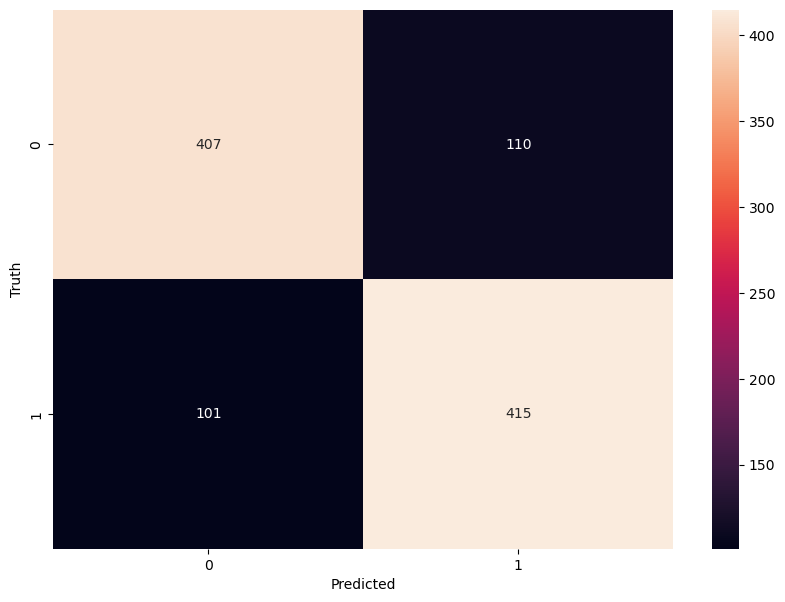

In [44]:
cm = confusion_matrix(ytest, ypred)

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Truth')